CSC 529 Project1  
Author : Lan Nguyen


In [34]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Rose.jpg to Rose.jpg


In [ ]:
img = cv2.imread('Rose.jpg')

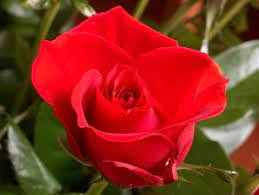

In [ ]:
cv2_imshow(img)

In [ ]:
#Number of rows, columns and chanels
print(img.shape)

(195, 259, 3)


In [ ]:
#Number of pixels
print(img.size)

151515


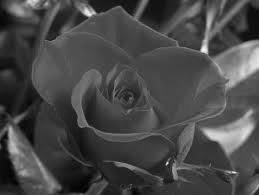

In [ ]:
#Convert the input image into grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

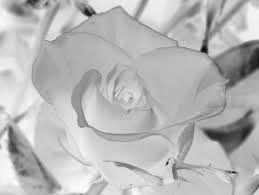

In [ ]:
img_inverted = cv2.bitwise_not(img_gray)
cv2.imwrite('Rose_Inverted.jpg', img_inverted)
cv2_imshow(img_inverted)

Translate the  gray-scale image 20 pixel down and 20 pixel to the right. Because changing 1 pixel wont give any different. 

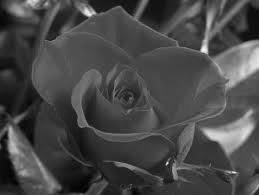

After translation: 


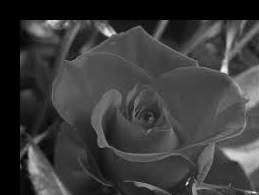

In [ ]:
height, width = img_gray.shape[:2] 
  
T = np.float32([[1, 0, 20], [0, 1, 20]]) 
  
# We use warpAffine to transform 
# the image using the matrix, T 
img_translation = cv2.warpAffine(img_gray, T, (width, height)) 


cv2_imshow(img_gray) 
plt.show()

print("After translation: ")

cv2_imshow(img_translation) 


Adjust the contrast

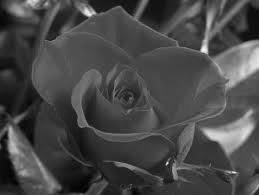

After adjust contrast: 


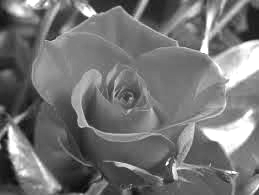

In [ ]:

img_contrast = np.zeros(img_gray.shape, img_gray.dtype)
alpha = 1.5 # Simple contrast control
beta = 10    # Simple brightness control

for y in range(img_gray.shape[0]):
    for x in range(img_gray.shape[1]):
        img_contrast[y,x] = np.clip(alpha*img_gray[y,x] + beta, 0, 255)


cv2_imshow(img_gray) 


print("After adjust contrast: ")

cv2_imshow(img_contrast) 



Threshold using adaptive gaussian thresholding

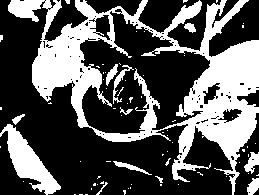

In [30]:
ret,thresh1 = cv2.threshold(img_contrast,127,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

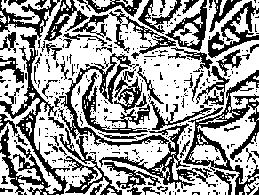

In [16]:

img_threshold = cv2.adaptiveThreshold(img_contrast,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

cv2_imshow(img_threshold)


Shrink threshold

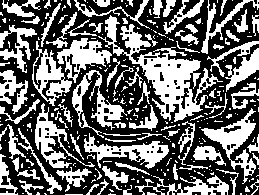

In [17]:
kernel = np.ones((2,2),np.uint8)
img_erosion = cv2.erode(img_threshold,kernel,iterations = 1)

cv2_imshow(img_erosion)

Expand threshold

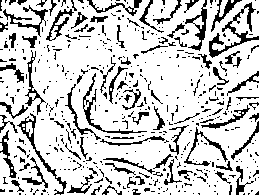

In [18]:
kernel2 = np.ones((2,2),np.uint8)

img_dilation = cv2.dilate(img_threshold,kernel2,iterations = 1)

cv2_imshow(img_dilation)

Salt and pepper reduction using closing 

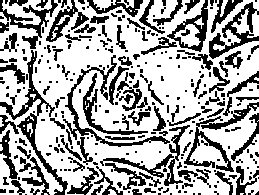

In [28]:
kernel3 = np.ones((2,2),np.uint8)
img_closing = cv2.morphologyEx(img_threshold, cv2.MORPH_CLOSE, kernel3)

cv2_imshow(img_closing)


Salt and pepper reduction using Median filter

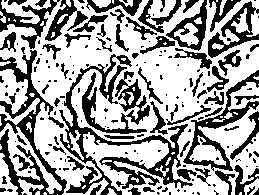

In [26]:
median_blur= cv2.medianBlur(img_threshold,3)
cv2_imshow( median_blur)  

Edges detection using Canny Edge Detection 

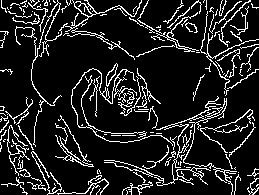

In [ ]:
edges = cv2.Canny(img_gray,30,120)

cv2_imshow(edges)

3x3 average filter

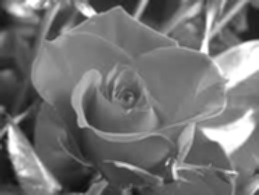

In [ ]:
img_blur = cv2.blur(img_contrast,(3,3))

cv2_imshow(img_blur)

Compare the results of the binary image edge detection algorithm with edge detection using only thresholding and shrinking/expanding  
- Edge detection give a better result, edges appear more clear than just using thresholing


Compare results of shrinking, expanding, and averaging when you use either 1, 0, or nearest pixel value for the off-image pixels.  
- Expanding give the best result

Apply the less strict noise reduction algorithm discussed in class (and the textbook) to the binary image.

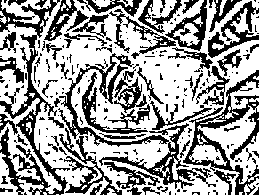

In [36]:
def lessStrict(img_threshold):
  img_lessStrict = deepcopy(img_threshold)
  for row in range(1, len(img_threshold) - 1):
    for col in range(1, len(img_threshold[0]) - 1):
      sigma = np.sum(img_threshold[row - 1:row + 2, col - 1:col + 2]) - img_threshold[row][col]
      if (sigma < 2 * 255):
        img_lessStrict[row][col] = 0
      elif (sigma > 6 * 255):
        img_lessStrict[row][col] = 255

  return img_lessStrict

img_lessStrict = lessStrict(img_threshold)
cv2_imshow(img_lessStrict)


Demonstrate the result of applying salt and pepper, and less strict noise reduction algorithm to the binary image sequentially (make a copy first).

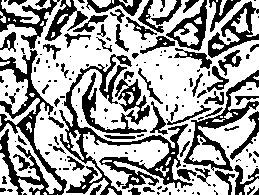

In [37]:
median_blur2= cv2.medianBlur(img_lessStrict,3)
cv2_imshow( median_blur2)  